converged after 4 iterations.


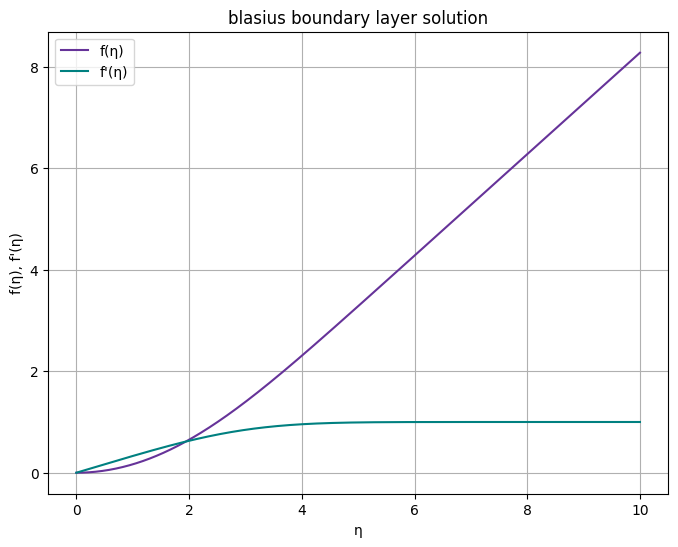

f''(0): 0.3320573372049457


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def blasius(eta, y):
    f, df, ddf = y
    df_deta = [df, ddf, -0.5 * f * ddf]
    return np.array(df_deta)

def rk4_step(ode_system, eta, y, h):
    k1 = h * ode_system(eta, y)
    k2 = h * ode_system(eta + h/2, y + k1/2)
    k3 = h * ode_system(eta + h/2, y + k2/2)
    k4 = h * ode_system(eta + h, y + k3)

    y_next = y + (k1 + 2*k2 + 2*k3 + k4) / 6
    return y_next

def blasius_rk4(ddf0, eta_max=10, n_points=1000):
    h = eta_max / (n_points - 1)
    eta_vals = np.linspace(0, eta_max, n_points)

    y = np.array([0, 0, ddf0])
    y_vals = np.zeros((n_points, 3))
    y_vals[0] = y

    for i in range(1, n_points):
        y = rk4_step(blasius, eta_vals[i-1], y, h)
        y_vals[i] = y

    return eta_vals, y_vals

#f'(eta_max) = 1
def optim(ddf0, eta_max=10):
    _, y_vals = blasius_rk4(ddf0, eta_max)
    df_inf = y_vals[-1, 1]  # f'(eta_max)
    return df_inf - 1

#f''(0)
def secant_method(ddf0_guess1, ddf0_guess2, tol=1e-6, max_iter=100):
    f1 = optim(ddf0_guess1)
    f2 = optim(ddf0_guess2)

    for i in range(max_iter):
        if f2 == f1:
            raise ValueError("secant method failed: f1 and f2 are equal, division by zero.")

        ddf0_new = ddf0_guess2 - f2 * (ddf0_guess2 - ddf0_guess1) / (f2 - f1)

        if abs(ddf0_new - ddf0_guess2) < tol:
            print(f"converged after {i+1} iterations.")
            return ddf0_new

        ddf0_guess1, ddf0_guess2 = ddf0_guess2, ddf0_new
        f1, f2 = f2, optim(ddf0_new)

    raise ValueError("secant method failed to converge.")

ddf0_guess1 = 0.3
ddf0_guess2 = 0.4
ddf0_solution = secant_method(ddf0_guess1, ddf0_guess2)

eta_vals, y_vals = blasius_rk4(ddf0_solution)

f_vals = y_vals[:, 0]
df_vals = y_vals[:, 1]

plt.figure(figsize=(8, 6))
plt.plot(eta_vals, f_vals, label="f(η)", color="rebeccapurple")
plt.plot(eta_vals, df_vals, label="f'(η)", color="teal")
plt.title("blasius boundary layer solution")
plt.xlabel("η")
plt.ylabel("f(η), f'(η)")
plt.legend()
plt.grid(True)
plt.show()

print(f"f''(0): {ddf0_solution}")

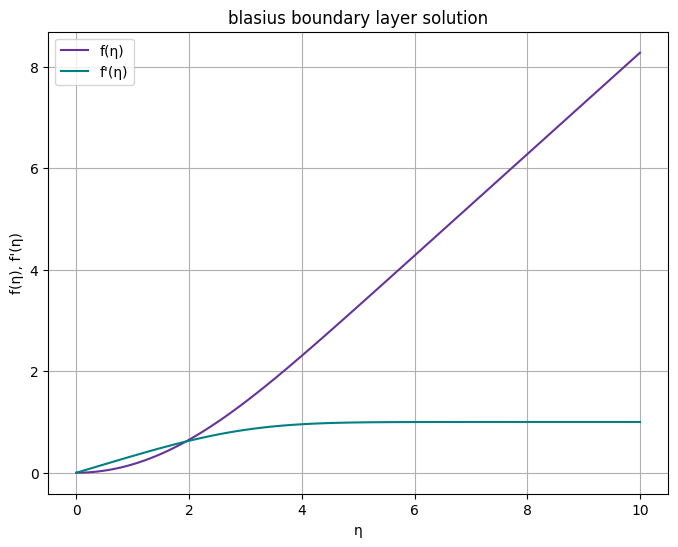

f''(0): 0.33200223413405183


In [2]:
from scipy.integrate import solve_ivp
from scipy.optimize import root_scalar

def blasius_system(eta, y):
    f, df, ddf = y
    return [df, ddf, -0.5 * f * ddf]

def optim(ddf_0):
    y0 = [0, 0, ddf_0]
    eta_span = [0, 10]  #int 0 a 10 (aprox. inf)
    sol = solve_ivp(blasius_system, eta_span, y0, t_eval=np.linspace(0, 10, 100))
    return sol.y[1, -1] - 1  # f'(eta=10) - 1

sol_shooting = root_scalar(optim, bracket=[0.3, 0.6], method='bisect')
ddf_0 = sol_shooting.root

#f''(0)
y0 = [0, 0, ddf_0]
eta_span = [0, 10]
sol = solve_ivp(blasius_system, eta_span, y0, t_eval=np.linspace(0, 10, 100))

#f(η), f'(η)
eta = sol.t
f = sol.y[0]
df = sol.y[1]

plt.figure(figsize=(8, 6))
plt.plot(eta, f, label="f(η)", color="rebeccapurple")
plt.plot(eta, df, label="f'(η)", color="teal")
plt.title("blasius boundary layer solution")
plt.xlabel("η")
plt.ylabel("f(η), f'(η)")
plt.legend()
plt.grid(True)
plt.show()

print(f"f''(0): {ddf_0}")